In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [ ]:
import kagglehub
import os

In [ ]:
#download dataset
path = kagglehub.dataset_download('sqdartemy/minecraft-screenshots-dataset-with-features')

100%|██████████| 4.89G/4.89G [03:01<00:00, 29.0MB/s]

Extracting files...


In [ ]:
#construct file path
f_path = os.path.join(path, 'features_and_decisions.csv')

In [ ]:
#read csv
mc = pd.read_csv(f_path)

In [ ]:
#ensure data loaded in correctly
mc.head()

,screenshot_title,activity,hearts,light_lvl,in_hand_item,target_mob,decision_activity,decision_hearts,decision_light,decision_mob
0,archering (100).png,archery,11,high,bow,no_mob,give_resistance,give_regeneration_2,no_decision_for_light,no_decision_for_mob
1,archering (108).png,archery,3,high,bow,no_mob,give_resistance,give_regeneration_4,no_decision_for_light,no_decision_for_mob
2,archering (112).png,archery,3,high,bow,no_mob,give_resistance,give_regeneration_4,no_decision_for_light,no_decision_for_mob
3,archering (12).png,archery,20,high,bow,no_mob,give_resistance,no_decision_for_hearts,no_decision_for_light,no_decision_for_mob
4,archering (1546).png,archery,15,high,bow,other,give_resistance,give_regeneration_1,no_decision_for_light,no_decision_for_mob


In [ ]:
#ensure there is no missing data
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6089 entries, 0 to 6088
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   screenshot_title   6089 non-null   object
 1   activity           6089 non-null   object
 2   hearts             6089 non-null   int64 
 3   light_lvl          6089 non-null   object
 4   in_hand_item       6089 non-null   object
 5   target_mob         6089 non-null   object
 6   decision_activity  6089 non-null   object
 7   decision_hearts    6089 non-null   object
 8   decision_light     6089 non-null   object
 9   decision_mob       6089 non-null   object
dtypes: int64(1), object(9)
memory usage: 475.8+ KB


In [ ]:
#combine to see if in hand item is always associated to one specific activity
mc['test'] = mc['activity'] + mc['in_hand_item']

In [ ]:
#does in hand item give away activity?
mc['test'].unique()

array(['archerybow', 'archerycrossbow', 'buildingblock',
       'buildingmiscellaneous', 'buildingno_item', 'walkingpickaxe',
       'walkingno_item', 'buildingaxe', 'fightingsword', 'fightingblock',
       'fightingaxe', 'fightingno_item', 'fightingmiscellaneous',
       'miningpickaxe', 'swimmingno_item', 'swimmingmiscellaneous',
       'swimmingsword', 'swimmingblock', 'walkingmiscellaneous',
       'buildingpickaxe', 'fightingbow', 'walkingblock', 'archeryno_item'],
      dtype=object)

In [ ]:
#target
mc['activity'].unique()

array(['archery', 'building', 'walking', 'fighting', 'mining', 'swimming'],
      dtype=object)

In [ ]:
#assign variables
X = mc[['hearts', 'light_lvl', 'in_hand_item', 'target_mob']]
y = mc['activity']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
#encode categorical
encoder = make_column_transformer(
    (OneHotEncoder(), ['light_lvl', 'in_hand_item', 'target_mob']),
    remainder='passthrough')

In [ ]:
#random forest
rf = RandomForestClassifier()

In [ ]:
#logistic regression
lr = LogisticRegression()

In [ ]:
#forest pipeline
f_pipe = Pipeline([('encoder', encoder), ('forest', rf)])

In [ ]:
#fit forest pipe
f_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['light_lvl', 'in_hand_item',
                                                   'target_mob'])])),
                ('forest', RandomForestClassifier())])

In [ ]:
#logistic pipeline
l_pipe = Pipeline([('encoder', encoder), ('logistic', lr)])

In [ ]:
#fit logistic pipe
l_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['light_lvl', 'in_hand_item',
                                                   'target_mob'])])),
                ('logistic', LogisticRegression())])

In [ ]:
#most frequently occurring activity to use as baseline
y_train.value_counts(normalize = True)

,proportion
activity,
archery,0.287560
fighting,0.262374
swimming,0.167981
walking,0.104906
mining,0.099869
building,0.077311


In [ ]:
#score based on accuracy
print('Baseline:', y_train.value_counts(normalize = True).max())
print(f'Forest Score: {f_pipe.score(X_test, y_test)}')
print(f'Logistic Score: {l_pipe.score(X_test, y_test)}')

Baseline: 0.28756022777047746
Forest Score: 0.9395929087327642
Logistic Score: 0.9100459619172685


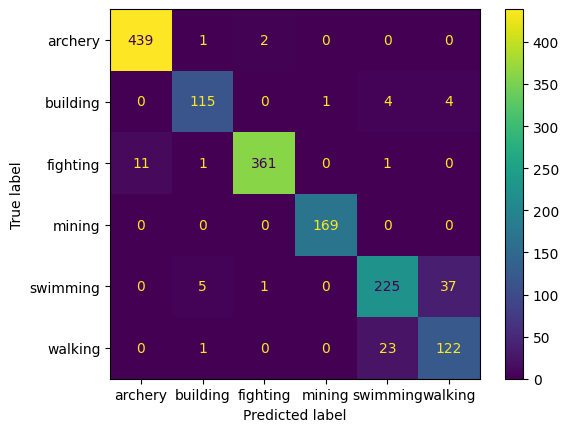

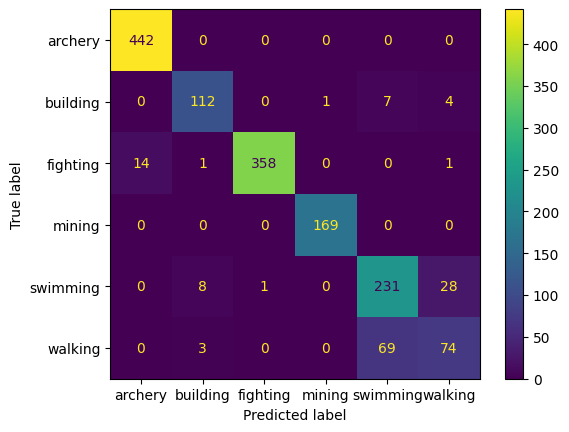

In [ ]:
#create confusion matrix
fcm = ConfusionMatrixDisplay.from_estimator(f_pipe, X_test, y_test)
lcm = ConfusionMatrixDisplay.from_estimator(l_pipe, X_test, y_test)

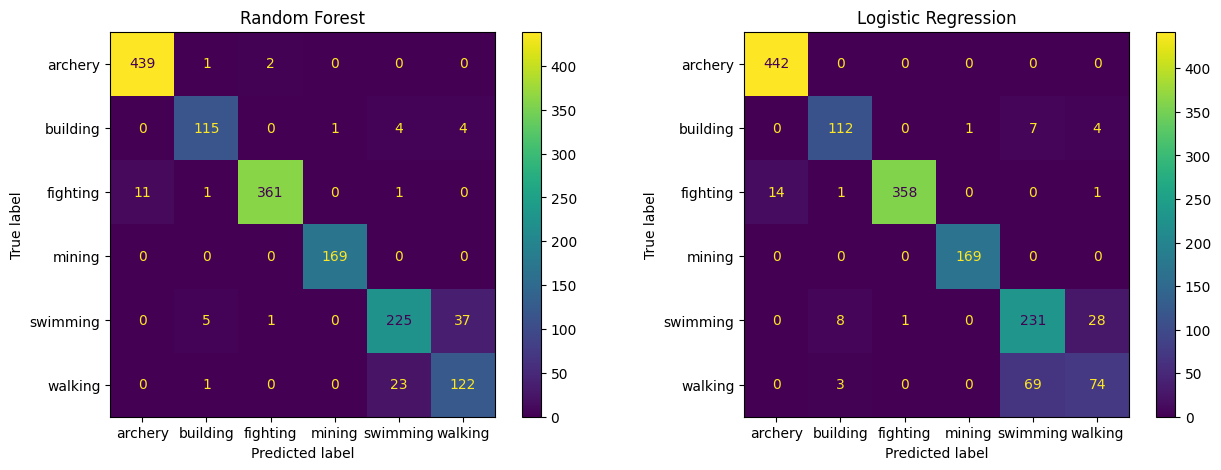

In [ ]:
#display confusion matrix side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fcm.plot(ax=ax[0])
ax[0].set_title('Random Forest')
lcm.plot(ax=ax[1])
ax[1].set_title('Logistic Regression');

In [ ]:
#params for grid search
params = {'forest__n_estimators': [10, 100, 400],
          'forest__max_depth': [1, 2, 3, None],
          'encoder__remainder': ['passthrough']}

In [ ]:
grid = GridSearchCV(f_pipe, param_grid=params)

In [ ]:
#fit grid
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['light_lvl',
                                                                          'in_hand_item',
                                                                          'target_mob'])])),
                                       ('forest', RandomForestClassifier())]),
             param_grid={'encoder__remainder': ['passthrough'],
                         'forest__max_depth': [1, 2, 3, None],
                         'forest__n_estimators': [10, 100, 400]})

In [ ]:
grid.best_params_

{'encoder__remainder': 'passthrough',
 'forest__max_depth': None,
 'forest__n_estimators': 10}

In [ ]:
grid.score(X_test, y_test)

0.9402495075508864

In [ ]:
steps = grid.best_estimator_.named_steps

In [ ]:
#feature importance
pd.DataFrame(steps['forest'].feature_importances_,
             index = steps['encoder'].get_feature_names_out(),
            columns = ['feature importance'])\
            .sort_values(by = 'feature importance',
            ascending = False)

,feature importance
onehotencoder__in_hand_item_bow,0.212637
onehotencoder__in_hand_item_sword,0.147922
onehotencoder__in_hand_item_pickaxe,0.133122
remainder__hearts,0.107281
onehotencoder__target_mob_no_mob,0.077688
onehotencoder__in_hand_item_block,0.065010
onehotencoder__in_hand_item_no_item,0.064238
onehotencoder__in_hand_item_axe,0.059194
onehotencoder__in_hand_item_miscellaneous,0.029545
onehotencoder__light_lvl_high,0.020378


In [ ]:
from IPython.display import Image

In [ ]:
#retrieve an image from downloaded dataset
image_title = mc.loc[10, 'screenshot_title']
image_path = os.path.join(path, 'screenshots', 'screenshots', image_title)

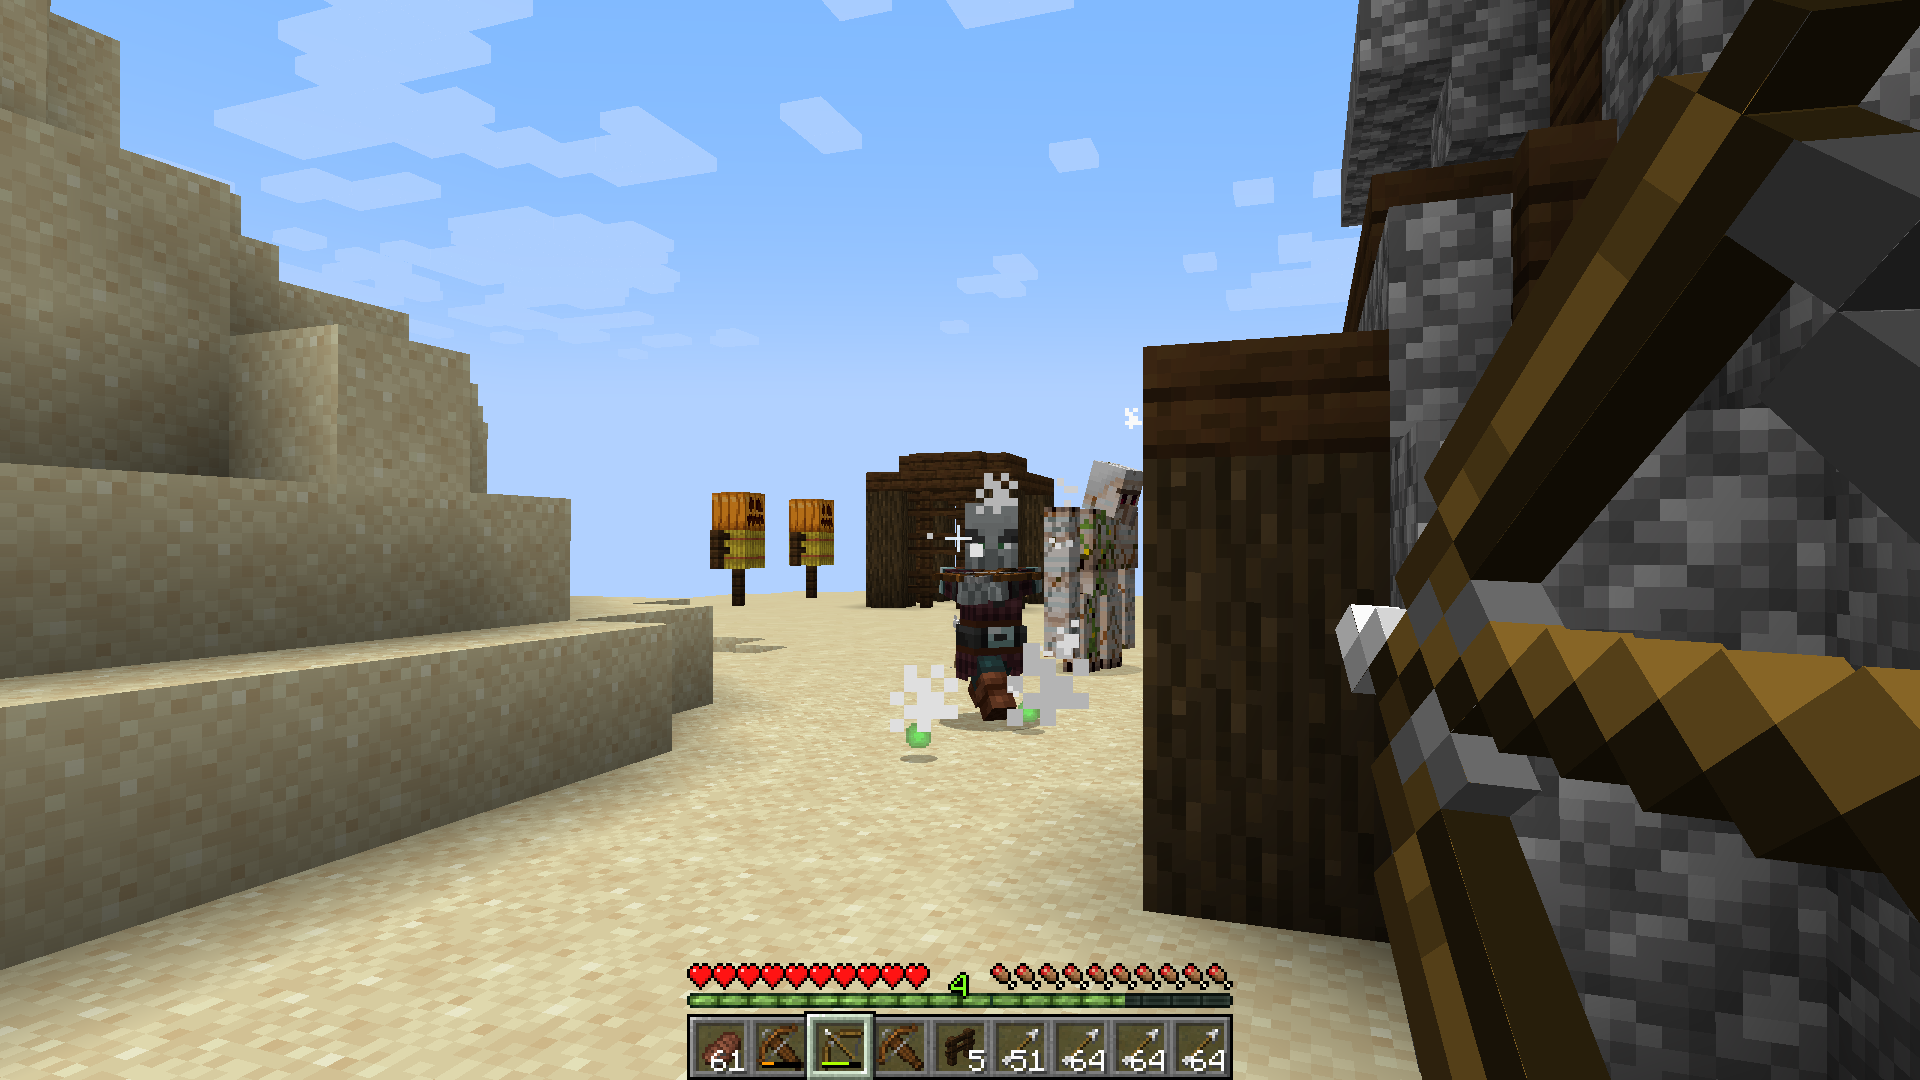

In [ ]:
display(Image(filename=image_path))

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToTensor, Resize, InterpolationMode
from torchvision.datasets import ImageFolder
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import shutil

In [ ]:
#get unique activity labels
activity = mc['activity'].unique()

In [ ]:
#create directory to store images
os.makedirs('images', exist_ok=True)

In [ ]:
#create subfolders
for a in activity:
  os.makedirs(os.path.join('images', a), exist_ok=True)

In [ ]:
#move images into folders
for index, row in mc.iterrows():
  image_path = os.path.join(path, 'screenshots', 'screenshots', row['screenshot_title'])
  activity = row['activity']
  destination_path = os.path.join('images', activity, os.path.basename(image_path))
  shutil.copy(image_path, destination_path)

In [ ]:
#load images
dataset = ImageFolder(root='images', transform = transforms.ToTensor())

In [ ]:
#train test split
train_data, test_data, train_labels, test_labels = train_test_split(dataset.imgs, dataset.targets, test_size=0.2, random_state=42)

In [ ]:
#define train
train_dataset = ImageFolder(root='images', transform = transforms.ToTensor())
train_dataset.imgs = train_data
train_dataset.targets = train_labels
train_dataset.samples = train_data

In [ ]:
#define test
test_dataset = ImageFolder(root='images', transform = transforms.ToTensor())
test_dataset.imgs = test_data
test_dataset.targets = test_labels
test_dataset.samples = test_data

In [ ]:
#create dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
#use gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#flatten the image and move to gpu
model = nn.Sequential(Resize((28, 28), interpolation=InterpolationMode.BILINEAR),
                             nn.Flatten(),
                      nn.Linear(in_features=28*28*3, out_features=6))
model = model.to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
for epoch in range(10):
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)


        outputs = model(images)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
#yhat
outputs

tensor([[ -8.5288,   2.3628,  -5.8554,   0.0435,   1.8156,   9.2777],
        [  5.9797,  -2.9238,   1.9047,  -1.8699,  -0.9137,  -2.5950],
        [ 16.0067,  -0.9872,   5.9066,  -7.2802,  -8.5676,  -5.7599],
        [ -2.6417,  -1.9737,  -2.6436,  -1.6143,   7.8137,   0.6633],
        [ -1.2321,  -0.2037,   7.0589,  -1.5730,  -2.5907,  -1.5947],
        [  3.1451,  -1.8338,   1.6938,  -0.4630,  -0.0955,  -2.5356],
        [ -1.6862,  -3.4426,  -2.9714,  -0.7049,  10.0230,  -1.7595],
        [ 17.8080,  -0.1488,  -1.5965,  -5.5610, -10.0180,  -1.7504],
        [ -1.1355,  -0.4155,   1.0159,   3.4752,  -1.9399,  -1.1616],
        [  0.1072,   1.8238,   2.5700,   0.6220,  -4.0843,  -1.5265],
        [  0.4960,  -1.0631,   0.5938,   1.7861,  -0.2419,  -1.6744],
        [ -0.4464,   2.8123,   4.3733,   0.2718,  -5.3469,  -2.0617],
        [  5.2547,  -1.9602,  -1.6356,  -2.1424,   1.2003,  -1.3432],
        [  2.2634,  -0.5489,   0.6460,  -0.2350,  -0.9894,  -1.2847],
        [ -2.9054,  

In [ ]:
#label encoder
encode = LabelEncoder()

In [ ]:
#create separate column for encoded labels
mc['activity_encoded'] = encode.fit_transform(mc['activity'])

In [ ]:
#see which activity aligns with the encoded activity
pd.DataFrame(mc['activity_encoded'].unique(), index = mc['activity'].unique(), columns = ['activity_encoded'])

,activity_encoded
archery,0
building,1
walking,5
fighting,2
mining,3
swimming,4


In [ ]:
#true values, y
labels

tensor([5, 0, 0, 4, 2, 0, 4, 0, 3, 1, 3, 2, 0, 0, 4, 0, 2, 0, 2, 4, 2, 0, 2, 4,
        2, 3, 2])

In [ ]:
#predicted categories
outputs.argmax(dim = 1)

tensor([5, 0, 0, 4, 2, 0, 4, 0, 3, 2, 3, 2, 0, 0, 2, 0, 2, 0, 2, 4, 2, 2, 2, 4,
        2, 3, 2], device='cuda:0')

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
    image = images.to(device)
    label = labels.to(device)
    output = model(image)
    correct += (output.argmax(dim = 1) == label).sum()
    total += len(label)

In [ ]:
print(f'Accuracy: {correct/total}')

Accuracy: 0.8735425472259521


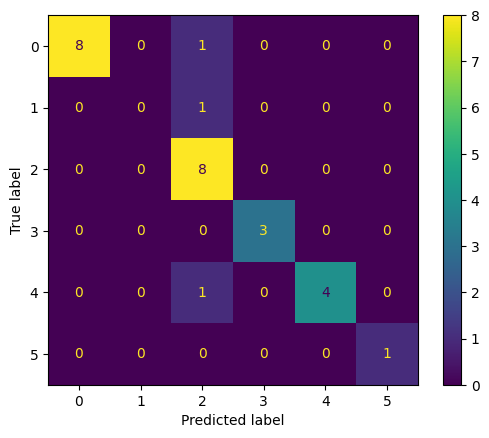

In [ ]:
#create confusion matrix
ConfusionMatrixDisplay.from_predictions(labels.cpu().numpy(), outputs.argmax(dim = 1).cpu().numpy())